## Paper Figures

In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

import seaborn as sns

sns.set(color_codes=True, style="white", context="talk", font_scale=1)
PALETTE = sns.color_palette("Set1")

from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from hyppo.independence import Dcorr
from scipy.stats import multiscale_graphcorr
from hyppo.ksample._utils import k_sample_transform
from graspy.plot import heatmap, pairplot

import sys

sys.path.append("../")
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2
%load_ext nb_black

/home/rflperry/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


<IPython.core.display.Javascript object>

In [2]:
## Define paths, get raw
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
groups, labels = get_latents(base_dir, flag="_gcca")

<IPython.core.display.Javascript object>

In [3]:
save_dir = Path("../reports/edification_mats-5-17")

<IPython.core.display.Javascript object>

In [4]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
label_transform = {
    "e": "Expert",
    "n": "Novice",
    "compassion": "Compasson",
    "restingstate": "Resting",
    "openmonitoring": "Open",
}
y_labels = [f"{label_transform[a]}" for a, b in y]

<IPython.core.display.Javascript object>

## 2-sample
- A, C, and mgc map for 
- MDS on A and C

In [61]:
ways = [[0], [0], [0], [1], [1], [1]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :,].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [62]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean") / 2

<IPython.core.display.Javascript object>

In [63]:
stat, pvalue, mgc_dict = multiscale_graphcorr(
    X_dists, Y_dists, workers=-1, reps=1, compute_distance=None, compute_c_mat=True
)
print(f'opt_scale: {mgc_dict["opt_scale"]}')

opt_scale: [3, 2]


<IPython.core.display.Javascript object>

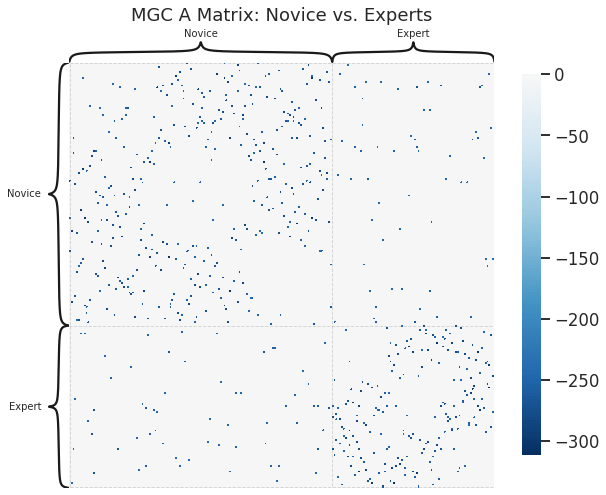

<IPython.core.display.Javascript object>

In [24]:
fig = heatmap(
    mgc_dict["a_mat"],
    title=f"MGC A Matrix: Novice vs. Experts",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig(save_dir / "A_mat_mgc_2samp_n-vs-e.pdf")
plt.show()

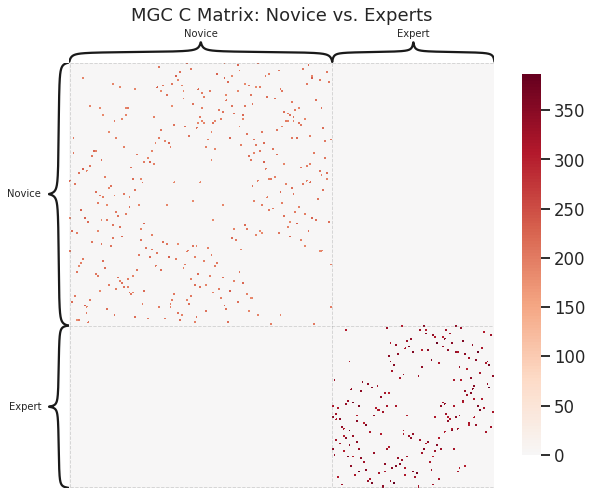

<IPython.core.display.Javascript object>

In [25]:
fig = heatmap(
    mgc_dict["c_mat"],
    title=f"MGC C Matrix: Novice vs. Experts",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig(save_dir / "C_mat_mgc_2samp_n-vs-e.pdf")
plt.show()

In [55]:
n_components = 3
a_mat_mds = MDS(n_components=n_components, dissimilarity="precomputed").fit_transform(
    (mgc_dict["a_mat"] + mgc_dict["a_mat"].T) / 2
)
c_mat_mds = MDS(n_components=n_components, dissimilarity="precomputed").fit_transform(
    (mgc_dict["c_mat"] + mgc_dict["c_mat"].T) / 2
)

<IPython.core.display.Javascript object>

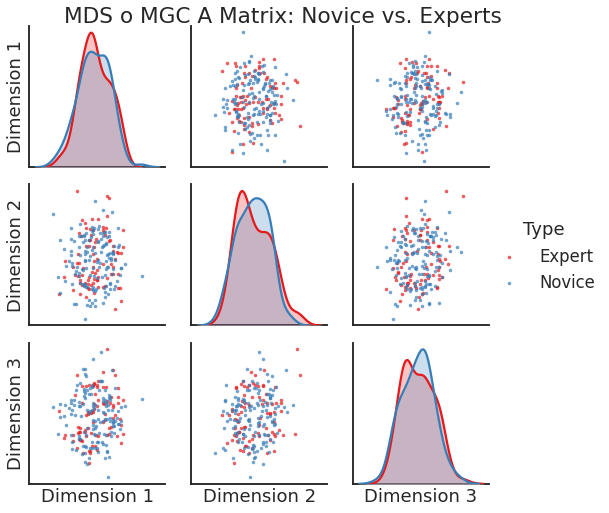

<IPython.core.display.Javascript object>

In [56]:
fig = pairplot(
    a_mat_mds, labels=y_labels, title=f"MDS o MGC A Matrix: Novice vs. Experts",
)
plt.savefig(save_dir / "A_mat_mds_mgc_2samp_n-vs-e.pdf")
plt.show()

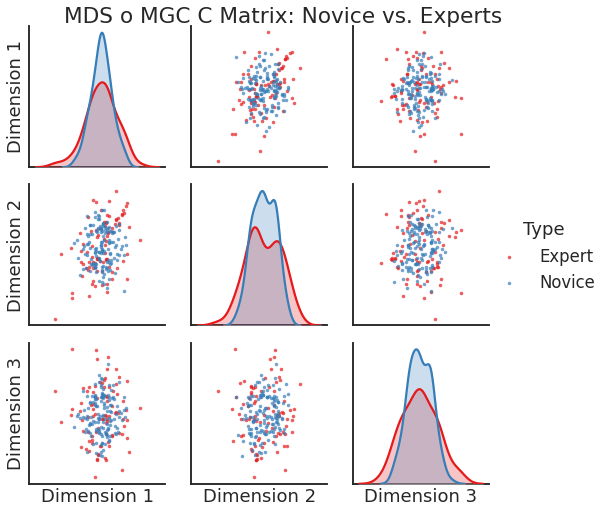

<IPython.core.display.Javascript object>

In [57]:
fig = pairplot(
    c_mat_mds, labels=y_labels, title=f"MDS o MGC C Matrix: Novice vs. Experts",
)
plt.savefig(save_dir / "C_mat_mds_mgc_2samp_n-vs-e.pdf")
plt.show()

## 2-way states vs traits
- A, C, and mgc map for 
- MDS on A and C

In [64]:
ways = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :,].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [65]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean") / 2

<IPython.core.display.Javascript object>

In [60]:
stat, pvalue, mgc_dict = multiscale_graphcorr(
    X_dists, Y_dists, workers=-1, reps=1, compute_distance=None, compute_c_mat=True
)
print(f'opt_scale: {mgc_dict["opt_scale"]}')

opt_scale: [207, 3]


<IPython.core.display.Javascript object>

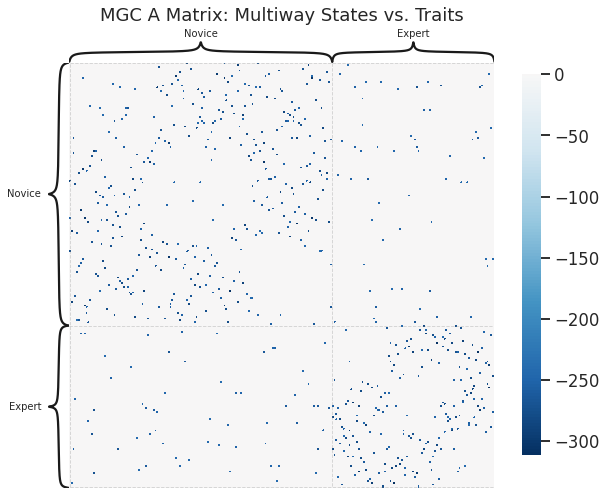

<IPython.core.display.Javascript object>

In [66]:
fig = heatmap(
    mgc_dict["a_mat"],
    title=f"MGC A Matrix: Multiway States vs. Traits",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig(save_dir / "A_mat_mgc_2way_6samp.pdf")
plt.show()

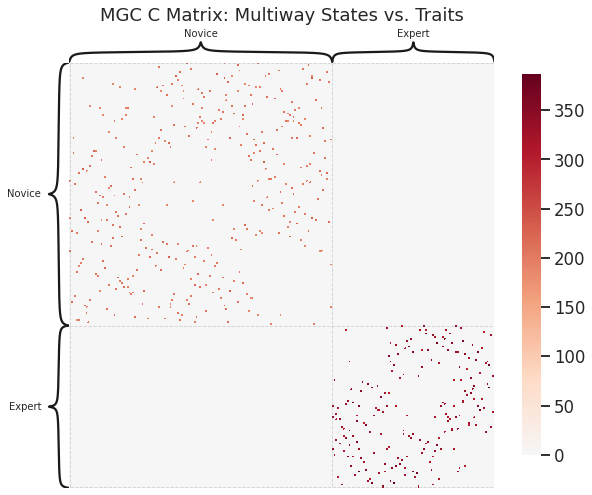

<IPython.core.display.Javascript object>

In [67]:
fig = heatmap(
    mgc_dict["c_mat"],
    title=f"MGC C Matrix: Multiway States vs. Traits",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig(save_dir / "C_mat_mgc_2way_6samp.pdf")
plt.show()

In [68]:
n_components = 3
a_mat_mds = MDS(n_components=n_components, dissimilarity="precomputed").fit_transform(
    (mgc_dict["a_mat"] + mgc_dict["a_mat"].T) / 2
)
c_mat_mds = MDS(n_components=n_components, dissimilarity="precomputed").fit_transform(
    (mgc_dict["c_mat"] + mgc_dict["c_mat"].T) / 2
)

<IPython.core.display.Javascript object>

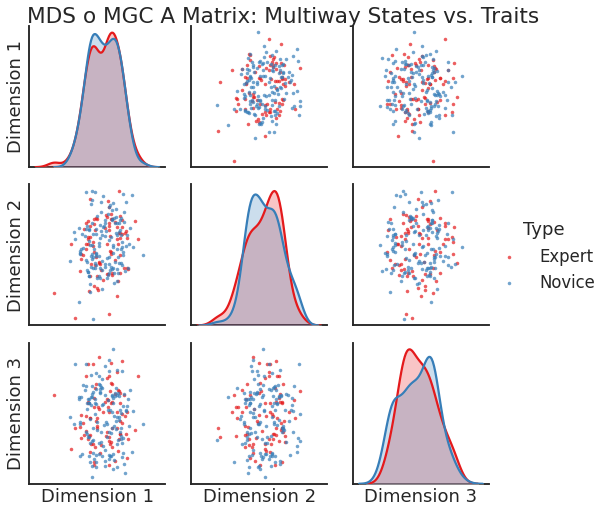

<IPython.core.display.Javascript object>

In [69]:
fig = pairplot(
    a_mat_mds, labels=y_labels, title=f"MDS o MGC A Matrix: Multiway States vs. Traits",
)
plt.savefig(save_dir / "A_mat_mds_mgc_2way_6samp.pdf")
plt.show()

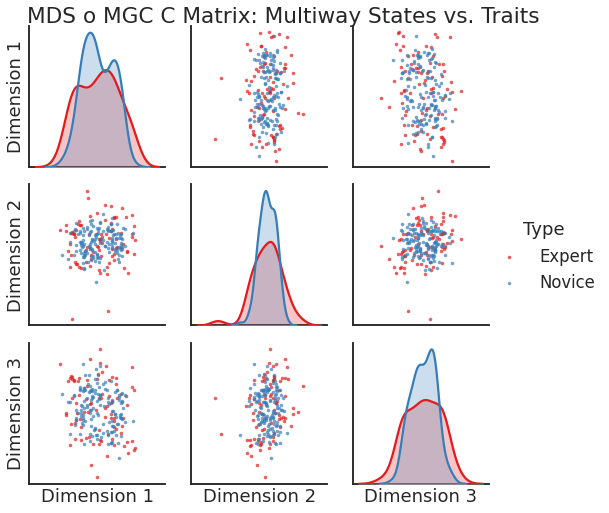

<IPython.core.display.Javascript object>

In [70]:
fig = pairplot(
    c_mat_mds, labels=y_labels, title=f"MDS o MGC C Matrix: Multiway States vs. Traits",
)
plt.savefig(save_dir / "C_mat_mds_mgc_2way_6samp.pdf")
plt.show()

## 1-way states vs traits
- A, C, and mgc map for 
- MDS on A and C

In [5]:
ways = [[0], [1], [2], [3], [4], [5]]
X, Y = k_sample_transform(groups, ways=ways)
X = X[:, :,].reshape(X.shape[0], -1)

<IPython.core.display.Javascript object>

In [6]:
X_dists = pairwise_distances(X, metric="euclidean")
Y_dists = pairwise_distances(Y, metric="sqeuclidean") / 2

<IPython.core.display.Javascript object>

In [7]:
stat, pvalue, mgc_dict = multiscale_graphcorr(
    X_dists, Y_dists, workers=-1, reps=1, compute_distance=None, compute_c_mat=True
)
print(f'opt_scale: {mgc_dict["opt_scale"]}')

opt_scale: [228, 2]


<IPython.core.display.Javascript object>

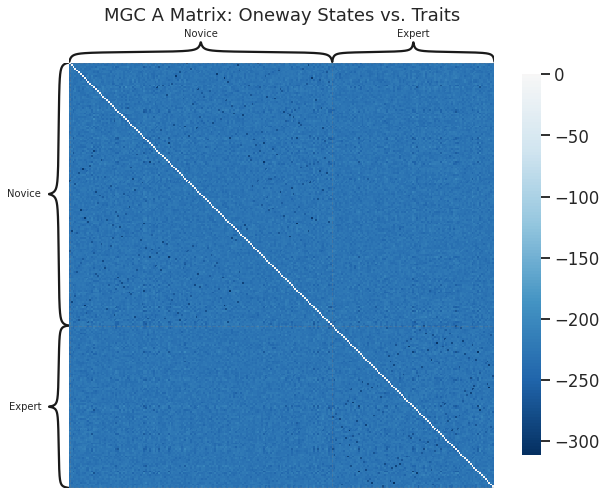

<IPython.core.display.Javascript object>

In [10]:
fig = heatmap(
    mgc_dict["a_mat"],
    title=f"MGC A Matrix: Oneway States vs. Traits",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig(save_dir / "A_mat_mgc_1way_6samp.pdf")
plt.show()

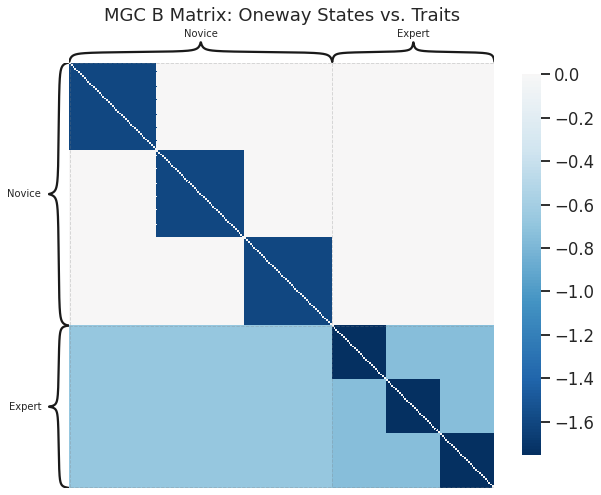

<IPython.core.display.Javascript object>

In [15]:
fig = heatmap(
    mgc_dict["b_mat"],
    title=f"MGC B Matrix: Oneway States vs. Traits",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.show()

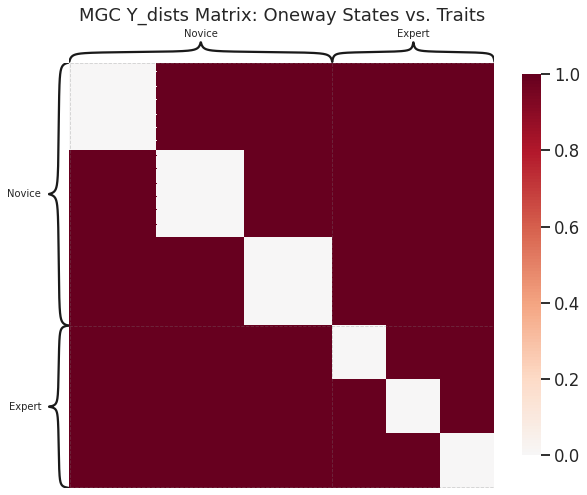

<IPython.core.display.Javascript object>

In [16]:
fig = heatmap(
    Y_dists,
    title=f"MGC Y_dists Matrix: Oneway States vs. Traits",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.show()

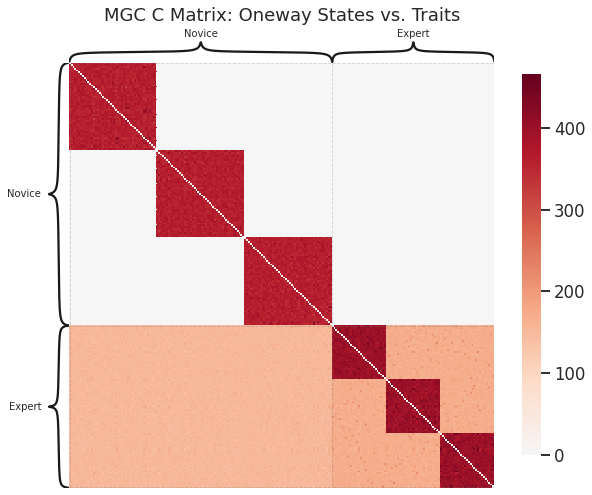

<IPython.core.display.Javascript object>

In [11]:
fig = heatmap(
    mgc_dict["c_mat"],
    title=f"MGC C Matrix: Oneway States vs. Traits",
    transform=None,
    inner_hier_labels=y_labels,
    hier_label_fontsize=10,
)
plt.savefig(save_dir / "C_mat_mgc_1way_6samp.pdf")
plt.show()

In [12]:
n_components = 3
a_mat_mds = MDS(n_components=n_components, dissimilarity="precomputed").fit_transform(
    (mgc_dict["a_mat"] + mgc_dict["a_mat"].T) / 2
)
c_mat_mds = MDS(n_components=n_components, dissimilarity="precomputed").fit_transform(
    (mgc_dict["c_mat"] + mgc_dict["c_mat"].T) / 2
)

<IPython.core.display.Javascript object>

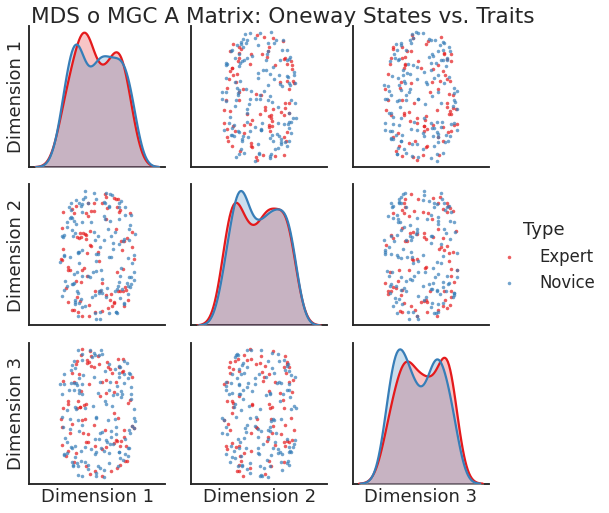

<IPython.core.display.Javascript object>

In [13]:
fig = pairplot(
    a_mat_mds, labels=y_labels, title=f"MDS o MGC A Matrix: Oneway States vs. Traits",
)
plt.savefig(save_dir / "A_mat_mds_mgc_1way_6samp.pdf")
plt.show()

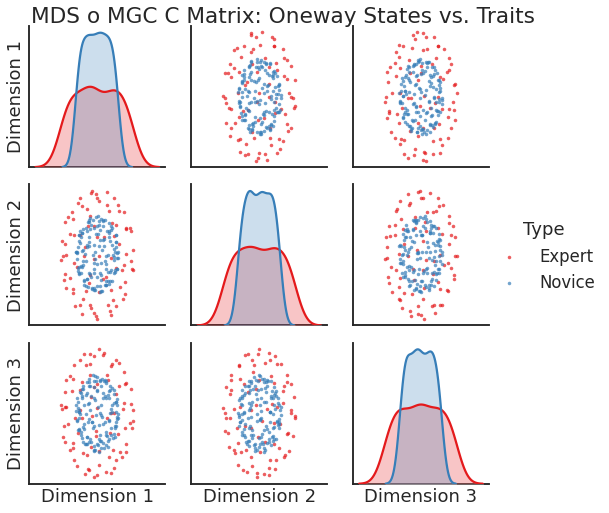

<IPython.core.display.Javascript object>

In [14]:
fig = pairplot(
    c_mat_mds, labels=y_labels, title=f"MDS o MGC C Matrix: Oneway States vs. Traits",
)
plt.savefig(save_dir / "C_mat_mds_mgc_1way_6samp.pdf")
plt.show()